In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
# Load and convert the image from BGR to RGB
image_path="../output/cropped_image.jpg"
image=cv2.imread(image_path) # Load the image
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # Convert the image to RGB

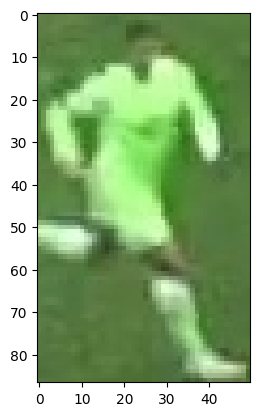

In [5]:
# Display the image
plt.imshow(image)
plt.show()

# taking top half of the image

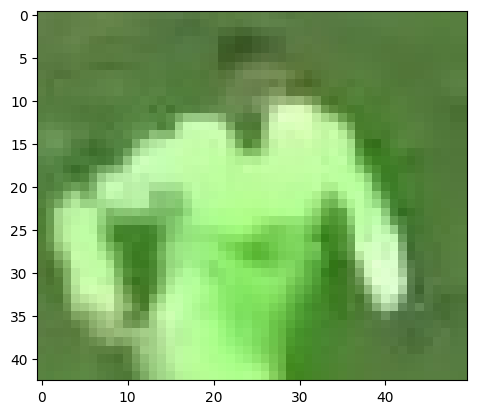

In [7]:
top_half_image=image[0:int(image.shape[0]/2),:,:] # taking top half of the image
plt.imshow(top_half_image)# Display the extracted top half
plt.show()# Render the displayed image

# clustering the images into 2 clusters

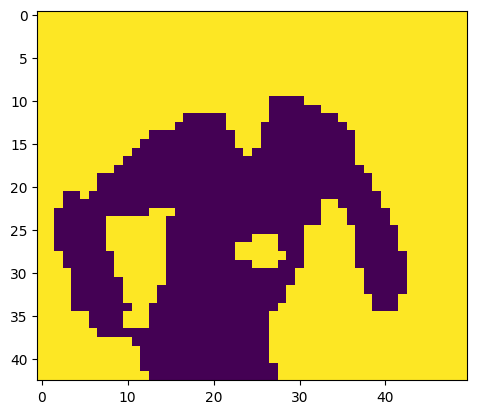

In [16]:
# reshape image into 2d format
image_2d=top_half_image.reshape((-1,3))

# perform k mean clustering with 2 clusters
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels=kmeans.labels_

# reshape the labels to original image shape
clustered_image=labels.reshape((top_half_image.shape[0],top_half_image.shape[1]))

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [18]:
# determine the non player cluster by checking the corner pixels
corner_cluster=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_cluster),key=list(corner_cluster).count)
print(non_player_cluster)

1


In [20]:
# player cluster is the other cluster
player_cluster=1-non_player_cluster
print(player_cluster)

0


In [22]:
# get the color of the player cluster
kmeans.cluster_centers_[player_cluster]

array([171.34417344, 235.71409214, 143.14498645])